<table align="left" width=100%>
    <tr>
        <td width="15%">
            <!-- <img src="faculty.png"> -->
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (NLP Session 5 ) </b>
                    <b> <br> Execute in Google Colab </b>
                </font>
            </div>
        </td>
    </tr>
</table>

1. **[Prompt Engineering Llama 2 for Text Classification & Text Generation](#pel2)**
    - 1.1 **[The Llama 2 Model](#tl2m)**
        - 1.1.1 **[TLDR - Understanding the code](#tutc)**
        - 1.1.2 **[The Data Loading & Model Inferencing Process (Llama 2 w/ Google Colab)](#tdlm)**
        - 1.1.3 **[Hugging Face Hub](#hfh)**
        - 1.1.4 **[Installing the Datasets library](#itdl)**
        - 1.1.5 **[Importing the Llama 2 model](#itl2m)**
        - 1.1.6 **[Initializing an instance of the Llama class with specified parameters](#iani)**
      <br></br>
    - 1.2 **[Problem Statement 1: Text Classification - Sentiment Analysis](#pstc)**
        - 1.2.1 **[Loading the IMDb Reviews Dataset](#lti)**
        - 1.2.2 **[Sentiment Classification](#sc)**
        - 1.2.3 **[System Message](#sm)**
        - 1.2.4 **[Prompt Template](#pt)**
        - 1.2.5 **[Few-shot Learning](#fsl)**
        - 1.2.6 **[Making Predictions with the LLM](#mpwtl)**
        - 1.2.7 **[Accuracy on the Test Set](#ats)**
        - 1.2.8 **[Precision](#pr)**
     <br></br>
   - 1.3 **[Problem Statement 2: Complaint Response Generation - Text Generation](#ps2crg)**

<a id="pel2"> </a>

# 1. **Prompt Engineering Llama 2 for Text Classification & Text Generation**

This notebook is meant to give a **quick demonstration of utilizing Large Language Models from Generative AI to perform classical NLP tasks**, such as Text Classification and Text Generation.

We shall utilize a **C++ quantized version of the Llama 2 13B chat model** from Hugging Face for this purpose, to ensure we can inference the model even on the free tier of Google Colab.

####  **Learning Objectives**

- To implement Prompt Engineering for Sentiment Analysis (including aspect based sentiment analysis) using Llama 2

- To illustrate the evaluation of LLMs on classification tasks

- To implement repsonse generation using Llama 2

<a id="tl2m"> </a>
## 1.1. **The Llama 2 Model**

**We will use the 5-bit integer quantized version of the LLaMA2 13b chat model on a single T4 GPU in Google Colab.**

**To load the model, we shall install all the pre-requisites and download the model weights from HuggingFace.**

In [4]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.3.1 from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip (python 3.11)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.2 MB/s eta 0:00:0000:0100:01m
  Running command pip subprocess to install build dependencies
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/134.5 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 133.1/134.5 kB 10.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.5/134.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/53.0 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Running command Getting requirements to build wheel
  Getting requirements to build wheel ... done
  Running command pip subprocess to install backend dependencies
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/47.4 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/47.4 MB 6

<a id="tutc"> </a>
### 1.1.1 **TLDR - Understanding the code**

**!CMAKE_ARGS="-DLLAMA_CUBLAS=on"**: This line sets an environment variable named CMAKE_ARGS with the value -DLLAMA_CUBLAS=on. It indicates that the cuBLAS library should be enabled for GPU-accelerated linear algebra operations if available.

**FORCE_CMAKE=1**: This line sets an environment variable called FORCE_CMAKE with the value 1. It instructs the installation process to use the CMake build system.

**pip install llama-cpp-python**: This command uses the pip package manager to install or upgrade the llama-cpp-python package. Pip will download and install the package from the Python Package Index (PyPI) or another specified source.

**--force-reinstall**: This option forces the reinstallation of the package, even if it is already installed on the system.

**--upgrade**: This option ensures that the installed package is upgraded to the latest version if a newer version is available.

**--no-cache-dir**: This option disables the use of pip's cache directory, which means that the package will be downloaded and installed directly from the source without using any cached files.

**--verbose**: This option enables verbose output during the installation process, providing more detailed information about each step being performed.

**About the cuBLAS library**

- The cuBLAS library provides highly optimized implementations of common linear algebra routines, such as matrix-matrix multiplication, matrix-vector multiplication, and linear system solvers. These operations are crucial in many scientific and computational tasks, including machine learning, numerical simulations, and data analysis.

- By utilizing the parallel processing power of GPUs, cuBLAS can significantly accelerate linear algebra computations compared to traditional CPU-based implementations. GPUs are designed with many cores and specialized hardware for parallel computation, making them well-suited for performing large-scale matrix operations in parallel.

- ***Applications that involve extensive matrix computations, such as deep learning models, numerical simulations, and scientific computations, can benefit from using the cuBLAS library***. It enables faster and more efficient calculations, reducing the overall computational time and enabling researchers and developers to tackle more complex problems.

**Why do we need the cuBlas library?**

Enabling the cuBLAS library with the -DLLAMA_CUBLAS=on flag can help in GPU-accelerated linear algebra operations performed by the "llama-cpp-python" package.

**Explaining - DLLAMA_CUBLAS=on flag**

The -DLLAMA_CUBLAS=on flag, when used with the DLLAMA_CUBLAS CMake variable, is typically used to enable the usage of the cuBLAS library in a CMake-based build system

<a id="tdlm"> </a>
 
### 1.1.2 **The Data Loading & Model Inferencing Process (Llama 2 w/ Google Colab)**

<img src="img.png" width="800" height="400">

<a id="hfh"> </a>
### 1.1.3 **Hugging Face Hub**
 

In [2]:
## For downloading the models from HF Hub
#!pip install huggingface_hub


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


<a id="itdl"> </a>
### 1.1.4 **Installing the Datasets library**

In [3]:
## For downloading datasets
#!pip install datasets


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


<a id="itl2m"> </a>
### 1.1.5 **Importing the Llama 2 model**

In [2]:
# Import the hf_hub_download function from the Hugging Face Hub library
from huggingface_hub import hf_hub_download

# Import the Llama class from the llama_cpp library
from llama_cpp import Llama


In [3]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

- Meta Llama2 recently presented the GGUF format model files for their Llama2 13B-chat.

- Llama2 is a collection of pretrained and fine-tuned large language models (LLMs) ranging from 7 billion to 70 billion parameters.

- GGUF (Generalized Graph Unification Format) is a new format introduced by the llama.cpp team on August 21st, 2023, as a replacement for the earlier GGML.

- The key benefit of GGUF is that it is a extensible, future-proof format which stores more information about the model as metadata. It also includes significantly improved tokenization code, including for the first time full support for special tokens. This has been shown to improve performance, especially with models that use new special tokens and implement custom prompt templates.



In [4]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

**hf_hub_download()**: This is a function from the Hugging Face Hub library that is being called to perform the download operation. It takes two arguments:

- **repo_id**: This argument is set to model_name_or_path, which specifies the model to download. The repo_id typically includes information about the model's repository or identifier.

- **filename**: This argument is set to model_basename, which specifies the desired filename for the downloaded model.

The hf_hub_download() function will connect to the Hugging Face Model Hub, locate the specified model using the provided repo_id, and then download it. The downloaded model will be saved locally with the specified filename. The model_path variable will contain the path to the downloaded model file on your local file system.



In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43, # Change this value based on your model and your GPU VRAM pool.
    n_ctx=4096, # Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /Users/kaustuvkunal/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: - tensor    0:                token_embd.weight q5_K     [  5120, 32000,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  5120,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q6_K     [ 13824,  5120,     1,     1 ]
llama_model_loader: - tensor    3:            blk.0.ffn_gate.weight q5_K     [  5120, 13824,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.ffn_up.weight q5_K     [  5120, 13824,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_norm.weight f32      [  5120,     1,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.attn_k.weight q5_K     [  5120,  51

<a id="iani"> </a>
### 1.1.6 **Initializing an instance of the Llama class with specified parameters**




**model_path=model_path**: Specifies the path to the model.

**n_threads=2**: This parameter is set to 2, which specifies the number of CPU cores that the Llama instance should use for its operations
- Modern CPUs often have multiple cores, allowing them to perform multiple tasks simultaneously. By specifying the number of threads, you're controlling how many of these cores the Llama instance will utilize.

**n_batch=512:** Sets the batch size (between 1 and n_ctx).It's typically used to specify the batch size for processing data with the model.It should be between 1 and n_ctx (context window), taking into consideration the GPU's VRAM capacity.
- In machine learning, especially with deep learning models, data is often processed in batches rather than one sample at a time. This is because it can lead to more efficient computations, taking advantage of parallel processing capabilities in modern hardware.
In this case, n_batch=512 means that the Llama instance is set to process data in batches of 512.
- Choosing an appropriate batch size is important for balancing computational efficiency with memory constraints.

**n_gpu_layers=43**: Specifies the number of GPU layers (adjust based on GPU VRAM).

**n_ctx=4096**:
 - This parameter specifies the context window size, which is a crucial aspect of how a language model processes and generates text.
- In the context of language models, a "context window" refers to the range of tokens (words or subwords) that the model considers when generating responses or making predictions.
- When the model generates text, it doesn't consider the entire input sequence but focuses on a limited window of context. This helps the model manage memory and computational resources efficiently.
- A larger context window can provide more context for generating coherent and contextually relevant responses. However, it may also come with increased memory requirements, as the model needs to store and process a larger amount of text.
- The choice of n_ctx should strike a balance between the need for context and the available computational resources (both CPU and GPU memory).


<a id="pstc"> </a>  
## 1.2 **Problem Statement 1: Text Classification - Sentiment Analysis**

<a id="lti"> </a>
### 1.2.1 **Loading the IMDb Reviews Dataset**

In [ ]:
# Import the random module for generating random numbers or choices.
import random

# Import the pandas library and alias it as 'pd' for easier use.
import pandas as pd

# Import the 'load_dataset' function from the 'datasets' library for loading datasets.
from datasets import load_dataset


In [ ]:
# Load the IMDb dataset using the 'load_dataset' function
dataset = load_dataset("imdb")

The IMDb dataset, organized as a DatasetDict, is a widely-used resource for tasks related to sentiment analysis and text classification.
It is structured into three splits: train, test, and unsupervised and contains two features: 'text' and 'label'.

**text**: a string feature that contains the movie reviews

**label**: a classification label, with possible values including negative (0), positive (1).**

Each split consists of text examples and their corresponding sentiment labels.
The training and testing sets each have 25,000 examples, while the unsupervised set has 50,000 examples.
The dataset is commonly used for sentiment analysis tasks, where the goal is to predict the sentiment (positive or negative) of movie reviews based on their text.

In [ ]:
imdb_train_df = dataset['train'].to_pandas()   ## Tto_pandas is used to convert the training data into a pandas DataFrame.
imdb_test_df = dataset['test'].to_pandas()  ##: It converts the testing data into another pandas DataFrame.

In [ ]:
(imdb_train_df.shape, imdb_test_df.shape)

Both the training and testing DataFrames have the same shape: 25,000 rows and 2 columns.

**Let us create a subset in the imdb_train_df.label, this will be further used to train the LLM via few shot learning method.**

In [ ]:
positive_examples = imdb_train_df.loc[imdb_train_df.label == 1, :].sample(3)
negative_examples = imdb_train_df.loc[imdb_train_df.label == 0, :].sample(3)

After executing these lines of code, you will have **two sets of examples:**

**positive_examples** containing three random positive sentiment examples, and

**negative_examples** containing three random negative sentiment examples.

In [ ]:
positive_examples

In [ ]:
negative_examples

In [ ]:
#concatenating the subsets of positive and negative sentiment examples (positive_examples and negative_examples)
examples = pd.concat([positive_examples, negative_examples]).to_json(orient='records')

#After concatenating the DataFrames, the to_json() method is applied to convert the combined DataFrame into a JSON (JavaScript Object Notation) format.
#The orient='records' argument specifies the format in which the JSON data should be structured.

<a id="sc"> </a>
### 1.2.2 **Sentiment Classification**

- In this problem statement, we will be working with the IMDb dataset of movie reviews, along with the labeled sentiment for each review.

- We will utilize a pre-trained Large Language Model as a Text Classification engine to do Sentiment Analysis. This will be done simply by prompting the model to play this role and giving it clear instructions to output as prediction only the Positive / Negative sentiment label associated with each review.


In [ ]:
# Import the 'json' module for handling JSON data.
import json

# Import the 'numpy' library and alias it as 'np' for convenience.
import numpy as np

# Import the 'Counter' class from the 'collections' module for counting occurrences of elements.
from collections import Counter

# Import 'tqdm' for displaying progress bars when iterating over data.
from tqdm import tqdm


 
<a id="sm"> </a>
### 1.2.3 **System Message**

While almost all LLMs started with the fundamental call-and-response structure of a prompt and completion (like ChatGPT), that simple structure has evolved over time.

**Today many models now incorporate two types of messages, which are then combined to form a single prompt.**

**The first type of message is the user message**. This is the specific user question or comment that the model responds to. For example, when you interact with generative AI chatbots like ChatGPT, Bard, Claude, or Bing, what you as the user type in is the “user message”.  

But hidden from your view as a user is another type of message: **the system message**, or the system prompt. The system message determines **what role the AI should play and how it should behave generally.**



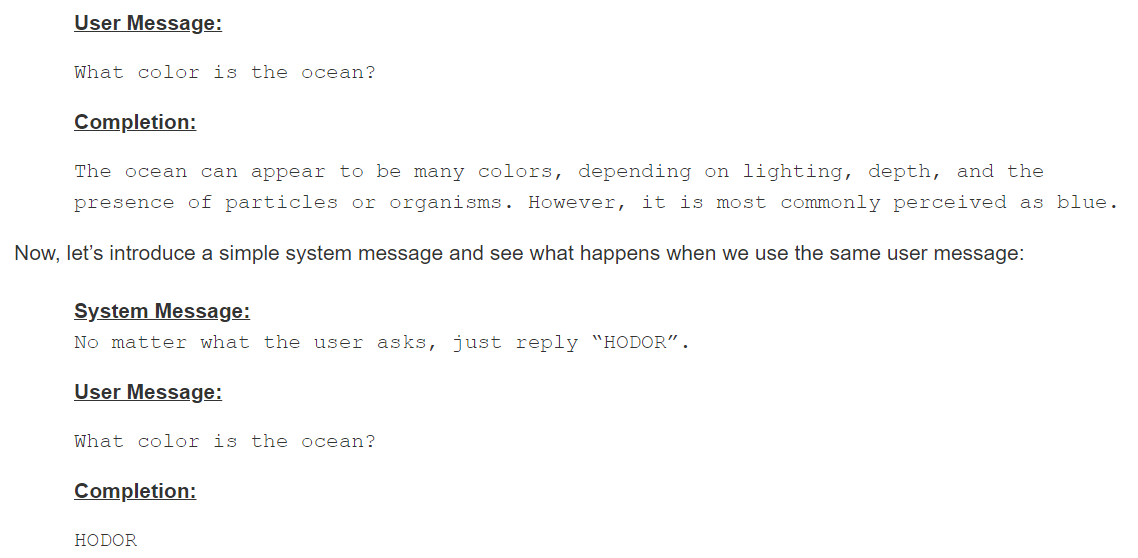

In [ ]:
system_message = """[INST]<<SYS>>Classify the sentiment of movie reviews presented in the input as 'positive' or 'negative'.
Movie reviews will be delimited by triple backticks in the input.
Answer only 'positive' or 'negative'. Do not explain your answer.

Instructions:
1. Carefully read the text of the review and consider the overall sentiment of the review
2. Estimate the probability of the review being positive

To re-iterate, your answer should strictly only contain the label: positive or negative.

Some examples of expected output are provided below as guidance.<</SYS>>[/INST]
"""

- The main content of the message provides instructions to the user on a specific task, which is to classify the sentiment of movie reviews as either 'positive' or 'negative'.
- It mentions that movie reviews will be delimited (separated) by triple backticks in the input.
- It emphasizes that the user should provide only the label ('positive' or 'negative') as the answer and should not explain their answer.
- Instructions are given, including reading the text of the review and estimating the probability of the review being positive.
The message also provides examples of expected output for guidance.

<a id="pt"> </a>
### 1.2.4 **Prompt Template**

In the world of language models, a prompt is a piece of text that instructs the model to generate a specific type of response.

A prompt template, as the name suggests, is a reproducible way to generate such prompts. It's essentially a text string that can take in a set of parameters from the end user and generate a prompt accordingly.

In [ ]:
prompt_template = """
[INST] ```{input_data}``` [/INST]
{output}
"""

In [ ]:
## Initialize an empty string to store few-shot examples
few_shot_examples = ''

<a id="fsl"> </a>
### 1.2.5 **Few-shot Learning**

"Few-shot Learning" is an ML paradigm where a model is trained to make predictions or perform tasks with very limited examples or "shots" of training data.

In traditional Machine Learning, models often require large amounts of labeled data for training. However, in few-shot learning, the goal is to enable a model to generalize and make accurate predictions or decisions when it has access to only a small number of examples.

- **positive_examples and negative_examples** represent small subsets of examples from the IMDb dataset, each containing only three examples.
These subsets could be used as "few-shot examples" to train a model for sentiment analysis.
- *The idea is to provide the model with a tiny amount of labeled data (in this case, positive and negative sentiment examples) and train it to make predictions based on this limited information.*
- The model's ability to generalize and make accurate predictions on unseen data (such as movie reviews not included in the few-shot examples) is the essence of few-shot learning.

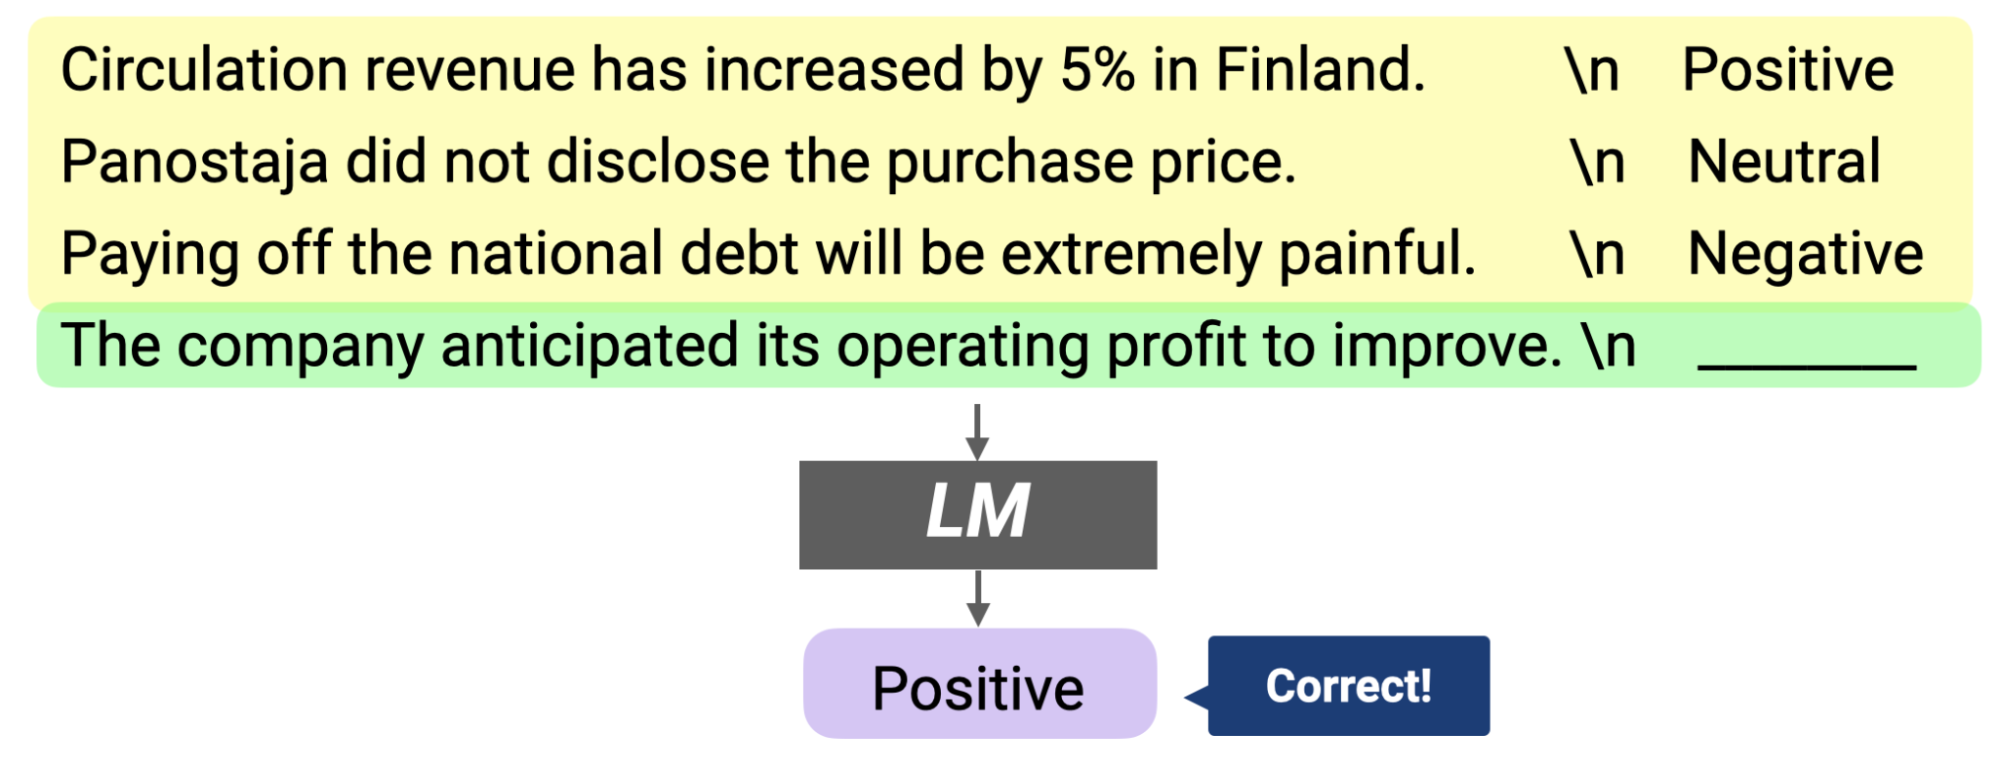

In [ ]:
## Iterate through each example in the JSON data which was created earlier
for example in json.loads(examples):
        # Extract the input data (text) from the example, excluding the 'label'

    example_input = {i:example[i] for i in example if i!='label'}
    # Determine the sentiment prediction based on the 'label' value
    if example['label'] == 0:
        example_prediction = 'negative'
    else:
        example_prediction = 'positive'

    # Concatenate the input data and the predicted sentiment
    # using a template and add it to the 'few_shot_examples' string

    few_shot_examples += prompt_template.format(
        input_data=example_input['text'],  ###input_data is used in the prompt_template
        output=example_prediction          ###outpu is used in the prompt_template
    )

- **Initialization:** The code initializes an empty string variable
few_shot_examples, which will be used to accumulate few-shot examples.

- **Iteration through JSON Data**: It then iterates through each example in the JSON data obtained from json.loads(examples). This JSON data likely contains text examples and sentiment labels.

- **Data Extraction**: Within the loop, it extracts the input data (text) from each example, excluding the 'label'. This is stored in the example_input dictionary.

- **Sentiment Prediction**: It determines the sentiment prediction (example_prediction) based on the 'label' value. If the 'label' is 0, it predicts 'negative'; otherwise, it predicts 'positive'.

- **Few-Shot Example Construction**: The input data (text) and the predicted sentiment are concatenated into a formatted string using a template (prompt_template). This constructed string represents a few-shot example.

- **Accumulation**: The constructed few-shot example is then appended to the few_shot_examples string


After executing this code, few_shot_examples will contain a collection of few-shot examples, each with input text and its corresponding predicted sentiment ('positive' or 'negative'). These examples can be useful for tasks like fine-tuning model, as is often the case in few-shot learning scenarios.

In [ ]:
test_rows = json.loads(
    imdb_test_df.sample(100).to_json(orient='records')
)

The test_rows will contain a list of dictionaries, where each dictionary represents a single row (example) from the **IMDb testing dataset**. This allows you to work **with a subset of the testing data, specifically 100** randomly sampled rows, in a structured format within your Python code.

<a id="mpwtl"> </a>
### 1.2.6 **Making Predictions with the LLM**

In [ ]:
## Initialize empty lists to store model predictions and ground truth values.
model_predictions, ground_truths = [], []

In [ ]:
## Iterate through each row in the test data with a progress bar
for row in tqdm(test_rows):
      # Extract the input data (text) from the current row, excluding the 'label'
    test_input = {i:row[i] for i in row if i!='label'}

        # Construct a few-shot prompt by combining system message, few-shot examples, and test input
    few_shot_prompt = (
        system_message + few_shot_examples +
        prompt_template.format(
            input_data=test_input['text'],
            output=''
        )
    )

    try:
        # Use the model (lcpp_llm) to generate a response based on the few-shot prompt
        response = lcpp_llm(
            prompt=few_shot_prompt,
            max_tokens=2,
            temperature=0,
            top_p=0.95,
            repeat_penalty=1.2,
            top_k=50,
            stop=['INST'], # Dynamic stopping when such token is detected.
            echo=False # do not return the prompt
        )
        # Extract the model's prediction from the response

        prediction = response["choices"][0]["text"]

        # Append the model's prediction to the 'model_predictions' list, lowercased and stripped of whitespace
        model_predictions.append(prediction.strip().lower())

        # Determine the ground truth label based on the row's 'label' value and append it to 'ground_truths'
        if row['label'] == 0:
            ground_truths.append('negative')
        else:
            ground_truths.append('positive')
    except ValueError as e:
          # Handle any ValueErrors that may occur during the process and continue with the next row

        print(e)
        continue

- The code iterates through each row in the test_rows dataset, displaying a progress bar using tqdm for tracking progress.

- For each row, it extracts the input data (text) from the current row, excluding the 'label', and stores it in the test_input dictionary.

- It constructs a few-shot prompt by combining a system message, a few-shot example, and the current test input. This prompt is designed to be used as input for the model.

- Inside a try-except block, it uses the machine learning model (lcpp_llm) to generate a response based on the few-shot prompt. Several parameters, such as max_tokens, temperature, and stop, are set to control the model's behavior during response generation.

- It extracts the model's prediction from the response and appends it to the model_predictions list. The prediction is converted to lowercase and stripped of whitespace for consistency.

- It determines the ground truth label based on the 'label' value in the current row and appends it to the ground_truths list.

- In case of a ValueError during the process, it prints an error message and continues with the next row.

- After the loop completes, model_predictions will contain the model's predictions for the test data, and ground_truths will contain the true or ground truth labels. These lists can then be used for evaluating the model's performance, such as calculating accuracy, precision, recall, or other relevant metrics.

In [ ]:
Counter(model_predictions)

**Counter is a Python library that is often used to count the occurrences of elements in an iterable, such as a list.**

The output Counter({'negative': 53, 'positive': 47}) breaks down the counts of the unique elements (in this case, prediction labels) in the model_predictions list as follows:

'**negative**': The model made 53 predictions with the label 'negative'.

'**positive**': The model made 47 predictions with the label 'positive'.

In [ ]:
Counter(ground_truths)

This Counter object counts the occurrences of labels in the ground_truths list, which likely contains the true or ground truth labels for the test data.

**'negative'**: There are 56 instances in the dataset with the label 'negative'.

**'positive'**: There are 44 instances in the dataset with the label 'positive'.

<a id="ats"> </a>
### 1.2.7 **Accuracy on the Test Set**

In [ ]:
ground_truths = np.array(ground_truths)
model_predictions = np.array(model_predictions)


#ground_truths contains the true labels (ground truth) for a set of examples.
#model_predictions contains the labels predicted by a machine learning model for the same set of examples.

In [ ]:
(ground_truths == model_predictions).mean()

The code compares each element in ground_truths with the corresponding element in model_predictions. It checks if the model's prediction matches the actual label for each example.

For each comparison, if the model's prediction matches the true label, it's considered a correct prediction.

The code calculates the proportion (or mean) of correct predictions by dividing the number of correct predictions by the total number of examples.

An accuracy value of **0.95 (or 95%)** indicates that the model's predictions match the true labels for approximately 95% of the examples in the dataset. In other words, the model is correct in its classification for the vast majority of the examples - an example of the state-of-the-art performance that LLMs achieve in NLP tasks.


<a id="pr"> </a>
### 1.2.8 **Precision**

In machine learning, precision is an evaluation metric used to evaluate the performance of a classifier, particularly in imbalanced binary classification tasks where accuracy may not be a reliable indicator. It is defined as the ratio of true positive predictions to the sum of true positive and false positive predictions. In mathematical terms, precision is calculated as:


***Precision= TruePositives/(FalsePositives+TruePositives)***

Where:

True Positives (TP): The number of instances that were actually positive and were correctly predicted as positive by the model.

False Positives (FP): The number of instances that were actually negative but were incorrectly predicted as positive by the model.

In [ ]:
TP = ((model_predictions == 'positive') & (ground_truths == 'positive')).sum()
FP = ((model_predictions == 'positive') & (ground_truths == 'negative')).sum()
precision = TP / (TP+FP)

In [ ]:
precision

High accuracy (0.95) indicates that the model is making correct predictions for most movie reviews.

The high precision (0.9149) remains a positive sign, showing that when the model predicts a review as **"positive," or "negative " it is usually correct.**

The model is effective in correctly classifying both positive and negative sentiment

<a id="ps2crg"> </a>
## 1.3 **Problem Statement 2: Complaint Response Generation - Text Generation**

In this problem statement, we will be providing a dataset of complaint messages written by customers of a bank.

We will utilize a pre-trained Large Language Model as a Text Generation model, to generate the appropriate response to these complaints. This will also be done by providing specific instructions in the prompt that guide the model on what to keep in mind while giving this response.


In [ ]:
dataset = load_dataset("AdiOO7/Bank_Complaints")

The dataset is designed for tasks related to handling customer complaints in a bank's context. It is  used for training LLMs to generate responses to customer complaints.

Features: The dataset has three columns/features, which are named:
"Instruction"
"Response"
"Input"

**"Instruction"**: This column provides instructions or guidance to the user or model about how to respond to the complaint. It simulates the role of a spokesperson for the bank who needs to provide a public response to a customer's complaint.

**"Response"**: This column contains the response generated by the model or system in response to the customer's complaint.

**"Input"**: This column contains the text of the customer's complaint or issue. It provides the context for the response and represents what the customer is complaining about.

In [ ]:
system_message = """[INST]<<SYS>>As a spokesperson person of a particular bank, you are tasked to give a public response to a user's complaint presented as input.
Instructions:
1. Carefully observe the intensity and severity of the complaint received as input.
2. Choose a carefully worded public response. You need to reply to every complaint, however, responding with "Company chooses not to provide a public response" is also a valid response.
Some examples of appropriate response are provided below as guidance.<</SYS>>[/INST]
"""

In [ ]:
prompt_template = """
[INST] {input_example} [/INST]
{output_example}
"""

In [ ]:
few_shot_examples = ''

In [ ]:
for i in range(5):
    sample_document = dataset['train'][random.randint(0, 1829)]
    user_input_example = sample_document['Input']
    assistant_output_example = sample_document['Response']

    few_shot_examples += prompt_template.format(
        input_example=user_input_example,
        output_example=assistant_output_example
    )

In [ ]:
test_document = dataset['train'][random.randint(0, 1829)]
new_complaint = test_document['Input']

In [ ]:
few_shot_prompt = (
    system_message +
    few_shot_examples +
    prompt_template.format(
        input_example=new_complaint,
        output_example=''
    )
)

In [ ]:
response = lcpp_llm(
    prompt=few_shot_prompt,
    max_tokens=256,
    temperature=0,
    top_p=0.95,
    repeat_penalty=1.2,
    top_k=50,
    stop=['INST'], # Dynamic stopping when such token is detected.
    echo=False # do not return the prompt
)

In [ ]:
new_complaint

In [ ]:
print(response["choices"][0]["text"])

As we can see, the LLM has been able to successfully follow the System Instructions and provide a suitable response to the complaint, despite the complaint not being worded very well. This is possible due to the (albeit simple) Prompt Engineering that has accompanied the application of this model - the Llama 2 model, as we can see, provides a high-quality response that is comparable to the best proprietary LLMs, such as the GPT models from OpenAI.